# Project of Analyze Data of Saudi Stock Exchange (Tadawul)

#### Problem Statement and Questions :

Using data science in the stock market is not new, but that doesn't apply for Saudi Stock Exchange (Tadawul), It needs to be explored and studied deeply. This project aims to analyze the Saudi Stock Market (Tadawul) data, as it answers some questions related to the data, such as: What is the day that achieves the highest trades? What companies have the highest stock price? What companies have the lowest stock price? Then I will build a model that predicts stock closing prices, I implement this project to pass the T5 Data Scientist Bootcamp.

### Import Libraries that will use in this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

### Load Data

In [2]:
df = pd.read_csv("Tadawul_stcks.csv")
df2 = pd.read_csv("Tadawul_stcks_23_4.csv")
df = df2.append(df,ignore_index=True)
df.rename(columns={'trading_name ': 'trading_name', 'volume_traded ': 'volume_traded','no_trades ':'no_trades'}, inplace=True)
df.head()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.8,31.8,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.5,31.4,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.7,32.3,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.7,32.9,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.5,32.8,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0


In [3]:
df.shape

(600811, 14)

### Visualize Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600811 entries, 0 to 600810
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   symbol         600811 non-null  int64  
 1   name           600811 non-null  object 
 2   trading_name   600811 non-null  object 
 3   sectoer        600811 non-null  object 
 4   date           600811 non-null  object 
 5   open           594194 non-null  float64
 6   high           593952 non-null  float64
 7   low            593952 non-null  float64
 8   close          600811 non-null  float64
 9   change         600811 non-null  float64
 10  perc_Change    600811 non-null  float64
 11  volume_traded  600811 non-null  float64
 12  value_traded   600811 non-null  float64
 13  no_trades      593120 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 64.2+ MB


In [5]:
df.describe()

,symbol,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
count,600811.000000,594194.000000,593952.000000,593952.000000,600811.000000,600811.000000,600811.000000,6.008110e+05,6.008110e+05,593120.000000
mean,3954.561125,41.047237,41.778572,40.404850,40.768032,0.000115,0.031324,1.667169e+06,4.977714e+07,962.009735
std,2284.245266,86.266380,88.717059,84.126867,86.039931,4.756607,3.483438,5.460104e+06,1.466421e+08,3386.441587
min,1010.000000,1.950000,1.950000,1.950000,0.000000,-681.200000,-100.000000,0.000000e+00,0.000000e+00,0.000000
25%,2140.000000,16.100000,16.310000,15.900000,15.990000,-0.250000,-0.920000,1.490520e+05,4.100598e+06,159.000000
50%,4004.000000,26.400000,26.800000,26.000000,26.170000,0.000000,0.000000,4.334070e+05,1.204201e+07,379.000000
75%,5110.000000,46.300000,47.000000,45.700000,46.000000,0.250000,0.910000,1.266960e+06,3.536168e+07,905.000000
max,8312.000000,6709.150000,6774.510000,6130.720000,6441.180000,578.430000,1634.440000,7.976659e+08,1.586582e+10,816526.000000


In [6]:
print("Sum of Null value in Open feature",df.open.isna().sum())
print("Sum of Null value in high feature",df.high.isna().sum())
print("Sum of Null value in low feature",df.low.isna().sum())
print("Sum of Null value in no_trades feature",df.no_trades.isna().sum())

Sum of Null value in Open feature 6617
Sum of Null value in high feature 6859
Sum of Null value in low feature 6859
Sum of Null value in no_trades feature 7691


### Cleaning Data

In [7]:
# remove null value
df.dropna()

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
0,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.8,31.80,31.45,31.60,0.25,0.80,230790.0,7.295881e+06,507.0
1,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.5,31.40,30.30,31.35,-0.35,-1.10,422695.0,1.311302e+07,1015.0
2,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.7,32.30,31.30,31.70,-0.75,-2.31,266845.0,8.497563e+06,668.0
3,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.7,32.90,32.10,32.45,-0.25,-0.76,254463.0,8.271461e+06,557.0
4,2030,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.5,32.80,32.45,32.70,0.50,1.55,199425.0,6.500652e+06,498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600806,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-28,22.9,22.90,21.62,22.50,0.00,0.00,1860532.0,4.149566e+07,2023.0
600807,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-27,23.3,23.32,22.24,22.50,-0.84,-3.60,4905676.0,1.114168e+08,3259.0
600808,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-26,24.6,24.60,23.30,23.34,-1.16,-4.73,3908215.0,9.269862e+07,2672.0
600809,4321,Arabian Centres Co.,ALMRAKEZ,Real Estate,2019-05-23,24.8,25.00,24.34,24.50,-0.50,-2.00,4078214.0,1.002221e+08,5571.0


In [8]:
df.duplicated().sum()

240

In [9]:
#remove all duplicated value
df.drop_duplicates(inplace = True)

In [10]:
# to check if Remove the duplicate row or no
df.duplicated().sum()

0

In [11]:
Company = df.groupby('name').open.max()
x = Company
y = df['high']

In [12]:
new_df =df[df['no_trades'].isna()]
new_df

,symbol,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades
410749,1120,Al Rajhi Bank,ALRAJHI,Financials,2020-03-05,61.70,61.70,60.60,61.00,-0.30,-0.49,8101466.0,4.954567e+08,NaN
410750,1120,Al Rajhi Bank,ALRAJHI,Financials,2020-03-04,60.20,61.40,59.50,61.30,-0.40,-0.65,9326748.0,5.659671e+08,NaN
410751,1120,Al Rajhi Bank,ALRAJHI,Financials,2020-03-03,61.00,61.80,60.60,61.70,2.00,3.35,8509603.0,5.205188e+08,NaN
410752,1120,Al Rajhi Bank,ALRAJHI,Financials,2020-03-02,60.70,61.40,59.60,59.70,0.20,0.34,11089823.0,6.743387e+08,NaN
410753,1120,Al Rajhi Bank,ALRAJHI,Financials,2020-03-01,60.00,60.50,58.70,59.50,-2.40,-3.88,10265006.0,6.127172e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422196,1150,Alinma Bank,ALINMA,Financials,2008-06-09,14.25,14.62,13.87,14.06,-0.19,-1.33,165363310.0,2.342107e+09,NaN
422197,1150,Alinma Bank,ALINMA,Financials,2008-06-08,15.37,15.75,14.06,14.25,-0.18,-1.25,451214654.0,6.706081e+09,NaN
422198,1150,Alinma Bank,ALINMA,Financials,2008-06-07,14.06,14.43,13.68,14.43,1.31,9.98,89221585.0,1.273346e+09,NaN
422199,1150,Alinma Bank,ALINMA,Financials,2008-06-04,12.56,13.12,12.37,13.12,1.12,9.33,234809131.0,3.012619e+09,NaN


In [13]:
df.dropna(inplace=True)

In [14]:
#Here we do not have any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586021 entries, 0 to 600810
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   symbol         586021 non-null  int64  
 1   name           586021 non-null  object 
 2   trading_name   586021 non-null  object 
 3   sectoer        586021 non-null  object 
 4   date           586021 non-null  object 
 5   open           586021 non-null  float64
 6   high           586021 non-null  float64
 7   low            586021 non-null  float64
 8   close          586021 non-null  float64
 9   change         586021 non-null  float64
 10  perc_Change    586021 non-null  float64
 11  volume_traded  586021 non-null  float64
 12  value_traded   586021 non-null  float64
 13  no_trades      586021 non-null  float64
dtypes: float64(9), int64(1), object(4)
memory usage: 67.1+ MB


In [15]:
df['date'] = pd.to_datetime(df.date)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586021 entries, 0 to 600810
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   symbol         586021 non-null  int64         
 1   name           586021 non-null  object        
 2   trading_name   586021 non-null  object        
 3   sectoer        586021 non-null  object        
 4   date           586021 non-null  datetime64[ns]
 5   open           586021 non-null  float64       
 6   high           586021 non-null  float64       
 7   low            586021 non-null  float64       
 8   close          586021 non-null  float64       
 9   change         586021 non-null  float64       
 10  perc_Change    586021 non-null  float64       
 11  volume_traded  586021 non-null  float64       
 12  value_traded   586021 non-null  float64       
 13  no_trades      586021 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(3

In [17]:
df['sectoer'].unique()

array(['Energy', 'Materials', 'Industrials', 'Consumer Discretionary',
       'Communication Services', 'Consumer Staples', 'Health Care',
       'Financials', 'Information Technology', 'Utilities', 'Real Estate'],
      dtype=object)

In [18]:
df['sectoer'].value_counts()

Financials                146369
Materials                 142953
Consumer Staples           65207
Industrials                64572
Consumer Discretionary     55666
Real Estate                45399
Communication Services     21523
Health Care                18098
Energy                     15906
Utilities                   9455
Information Technology       873
Name: sectoer, dtype: int64

#### Drop column (symbol) 

In [19]:
df.drop('symbol',axis='columns',inplace=True)

In [20]:
df.dtypes  # symbol remove

name                     object
trading_name             object
sectoer                  object
date             datetime64[ns]
open                    float64
high                    float64
low                     float64
close                   float64
change                  float64
perc_Change             float64
volume_traded           float64
value_traded            float64
no_trades               float64
dtype: object

In [21]:
df['day'] = df['date'].dt.weekday
df.head()

,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
0,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-23,31.8,31.8,31.45,31.60,0.25,0.80,230790.0,7295880.55,507.0,3
1,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-22,30.5,31.4,30.30,31.35,-0.35,-1.10,422695.0,13113020.10,1015.0,2
2,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-21,31.7,32.3,31.30,31.70,-0.75,-2.31,266845.0,8497563.05,668.0,1
3,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-20,32.7,32.9,32.10,32.45,-0.25,-0.76,254463.0,8271461.45,557.0,0
4,Saudi Arabia Refineries Co.,SARCO,Energy,2020-04-19,32.5,32.8,32.45,32.70,0.50,1.55,199425.0,6500652.35,498.0,6


In [22]:
df['day'] = df['day'].astype(int)

# EDA Section

### What days have the greatest number of deals?

Text(0, 0.5, 'Number of Trades')

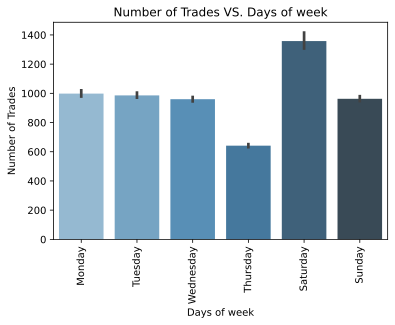

In [23]:
sns.barplot(x = 'day',y='no_trades',data=df, palette="Blues_d")
plt.xticks([0,1,2,3,4,5],['Monday','Tuesday','Wednesday','Thursday','Saturday','Sunday'],rotation=90)
plt.title('Number of Trades VS. Days of week')
plt.xlabel('Days of week')
plt.ylabel('Number of Trades')

### The sector which has the most deals 

Text(0, 0.5, 'Number of Trades')

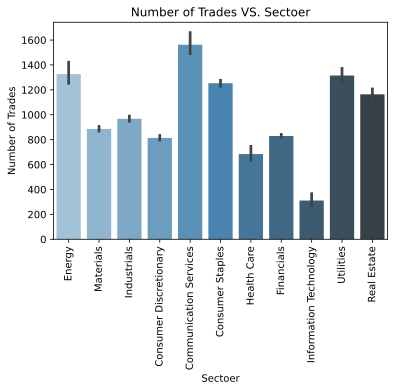

In [24]:
sns.barplot(x = 'sectoer',y='no_trades',data=df, palette="Blues_d")
plt.xticks(rotation=90)
plt.title('Number of Trades VS. Sectoer')
plt.xlabel('Sectoer')
plt.ylabel('Number of Trades')

In [25]:
df.sort_values("no_trades", ascending=False ,inplace = True)
df

,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
544024,Mobile Telecommunication Company Saudi Arabia,ZAIN KSA,Communication Services,2008-03-22,81.50,88.25,71.50,77.91,77.91,0.00,115608306.0,9.044469e+09,816526.0,5
31841,Saudi Arabian Mining Co.,MAADEN,Materials,2008-07-28,28.20,29.60,26.40,28.20,28.20,0.00,331054101.0,9.122116e+09,587262.0,0
14536,Rabigh Refining and Petrochemical Co.,PETRO RABIGH,Energy,2008-01-27,43.00,52.50,42.25,52.25,0.00,0.00,228520778.0,1.085658e+10,576072.0,6
122031,Northern Region Cement Co.,NORTHERN CEMENT,Materials,2013-02-05,18.00,68.00,17.75,30.00,20.00,200.00,234316831.0,5.985548e+09,540248.0,1
587752,Emaar The Economic City,EMAAR EC,Real Estate,2006-10-07,40.00,50.00,30.50,30.50,-69.50,-69.50,79549591.0,2.970939e+09,490155.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331504,National Agricultural Development Co.,NADEC,Consumer Staples,2002-01-22,4.40,4.40,4.40,4.42,0.00,0.00,3896.0,1.702000e+04,1.0,1
259207,Tourism Enterprise Co.,TECO,Consumer Discretionary,2002-04-06,6.75,6.75,6.75,6.75,0.25,3.85,7500.0,4.987500e+04,1.0,5
152716,Yanbu Cement Co.,YCC,Materials,2003-07-24,39.30,39.30,39.30,39.30,0.00,0.00,750.0,2.950000e+04,1.0,3
246151,Fitaihi Holding Group,FITAIHI GROUP,Consumer Discretionary,2002-02-03,9.30,9.10,9.10,9.10,-0.20,-2.15,8693.0,7.886700e+04,1.0,6


In [26]:
com = df.groupby(['trading_name'])
com.first().sort_values("no_trades", ascending=False)
com.head()

,name,trading_name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
544024,Mobile Telecommunication Company Saudi Arabia,ZAIN KSA,Communication Services,2008-03-22,81.50,88.25,71.50,77.91,77.91,0.00,115608306.0,9.044469e+09,816526.0,5
31841,Saudi Arabian Mining Co.,MAADEN,Materials,2008-07-28,28.20,29.60,26.40,28.20,28.20,0.00,331054101.0,9.122116e+09,587262.0,0
14536,Rabigh Refining and Petrochemical Co.,PETRO RABIGH,Energy,2008-01-27,43.00,52.50,42.25,52.25,0.00,0.00,228520778.0,1.085658e+10,576072.0,6
122031,Northern Region Cement Co.,NORTHERN CEMENT,Materials,2013-02-05,18.00,68.00,17.75,30.00,20.00,200.00,234316831.0,5.985548e+09,540248.0,1
587752,Emaar The Economic City,EMAAR EC,Real Estate,2006-10-07,40.00,50.00,30.50,30.50,-69.50,-69.50,79549591.0,2.970939e+09,490155.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564974,Bonyan REIT Fund,BONYAN REIT,Real Estate,2019-03-14,8.81,9.44,8.80,9.00,0.20,2.27,531309.0,4.890924e+06,720.0,3
564318,Swicorp Wabel REIT Fund,SWICORP WABEL REIT,Real Estate,2018-12-04,9.15,9.60,8.85,8.99,-0.11,-1.21,614421.0,5.588271e+06,701.0,1
564251,Swicorp Wabel REIT Fund,SWICORP WABEL REIT,Real Estate,2019-03-07,8.52,8.69,8.45,8.47,-0.14,-1.63,1176543.0,1.004019e+07,601.0,3
564236,Swicorp Wabel REIT Fund,SWICORP WABEL REIT,Real Estate,2019-03-28,8.04,8.52,8.03,8.44,0.36,4.46,554672.0,4.640727e+06,575.0,3


### What companies have the highest stock prices? 

In [27]:
com_h_p = com
com_h_p = com_h_p.first().sort_values("high", ascending=False)
com_h_p = com_h_p.head(10)
com_h_p.reset_index(inplace=True)

In [28]:
com_h_p

,trading_name,name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
0,ANAAM HOLDING,Anaam International Holding Group,Consumer Staples,2006-07-02,3130.72,3797.39,3130.72,3797.39,333.34,9.62,756541.0,2.682636e+09,56991.0,6
1,SPM,Saudi Paper Manufacturing Co.,Materials,2006-06-14,498.83,526.96,352.10,372.91,372.91,0.00,3975218.0,1.609166e+09,115268.0,2
2,SFICO,Saudi Fisheries Co.,Consumer Staples,2007-01-10,330.80,337.72,281.84,293.81,-15.88,-5.13,5609691.0,1.787390e+09,37190.0,2
3,NAMA CHEMICALS,Nama Chemicals Co.,Materials,2006-09-13,319.75,333.25,273.25,312.84,9.56,3.15,7592327.0,2.385427e+09,33459.0,2
4,SAUDI CABLE,Saudi Cable Co.,Industrials,2006-02-12,265.86,282.67,260.85,277.59,18.50,7.14,6109317.0,1.657906e+09,16993.0,6
5,SARCO,Saudi Arabia Refineries Co.,Energy,2006-05-02,272.75,273.00,248.50,258.50,-8.50,-3.18,2573630.0,6.770421e+08,13918.0,1
6,WAFRAH,Wafrah for Industry and Development Co.,Consumer Staples,2006-08-27,241.12,257.97,239.18,245.01,7.78,3.28,6304280.0,1.565283e+09,25850.0,6
7,WAFA INSURANCE,Saudi Indian Company for Cooperative Insurance,Financials,2007-09-01,233.26,234.72,194.22,201.00,-12.32,-5.78,1634372.0,3.633484e+08,29310.0,5
8,SVCP,Saudi Vitrified Clay Pipes Co.,Industrials,2007-05-26,160.25,200.00,143.00,187.00,142.00,315.56,22941496.0,4.022523e+09,125392.0,5
9,CARE,National Medical Care Co.,Health Care,2013-03-13,81.00,200.00,70.00,122.00,95.00,351.85,66863394.0,6.479747e+09,406108.0,2


Text(0.5, 1.0, 'Number of Trades VS. High Price')

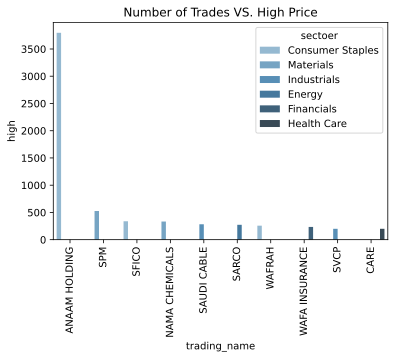

In [29]:
sns.barplot(x='trading_name', y='high' ,data= com_h_p, hue='sectoer' ,palette="Blues_d")
plt.xticks(rotation=90)
plt.title('Number of Trades VS. High Price')


### What companies have the lowest stock prices?

In [30]:
com_l_p = com
com_l_p = com_l_p.first().sort_values("low")
com_l_p = com_l_p.head(10)

In [31]:
com_l_p.reset_index(inplace=True)

In [32]:
com_l_p

,trading_name,name,sectoer,date,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
0,MASHAAR REIT,Al Mashaar REIT,Real Estate,2019-03-07,6.97,7.48,6.97,7.23,0.27,3.88,4841193.0,3.497082e+07,2707.0,3
1,MEFIC REIT,MEFIC REIT Fund,Real Estate,2019-12-30,7.80,7.98,7.79,7.86,0.07,0.90,7221290.0,5.708936e+07,3807.0,0
2,BONYAN REIT,Bonyan REIT Fund,Real Estate,2018-07-26,8.30,9.90,8.30,9.10,0.10,1.11,697579.0,6.394812e+06,1158.0,3
3,SEDCO CAPITAL REIT,SEDCO Capital REIT Fund,Real Estate,2018-05-02,8.64,9.09,8.52,8.70,-0.30,-3.33,703835.0,6.163654e+06,1321.0,2
4,DERAYAH REIT,Derayah REIT Fund,Real Estate,2018-03-26,9.31,9.35,9.00,9.00,-1.00,-10.00,6571047.0,5.998273e+07,2261.0,0
5,SWICORP WABEL REIT,Swicorp Wabel REIT Fund,Real Estate,2018-12-03,10.00,10.40,9.02,9.10,-0.37,-3.91,1117059.0,1.107352e+07,968.0,0
6,JADWA REIT SAUDI,Jadwa REIT Saudi Fund,Real Estate,2018-02-11,10.20,10.20,9.20,9.23,-0.77,-7.70,4435055.0,4.179816e+07,2262.0,6
7,Al RAJHI REIT,Al Rajhi REIT Fund,Real Estate,2018-03-20,9.52,10.06,9.52,9.62,-0.38,-3.80,8390138.0,8.256039e+07,5593.0,1
8,MULKIA REIT,Mulkia Gulf Real Estate REIT,Real Estate,2017-11-05,9.60,10.88,9.60,10.23,0.23,2.30,13347204.0,1.357647e+08,7028.0,6
9,ALAHLI REIT 1,AlAhli REIT Fund 1,Real Estate,2018-01-08,10.50,10.50,10.04,10.11,0.11,1.10,8619744.0,8.839379e+07,4903.0,0


Text(0.5, 1.0, 'Number of Trades VS. Low Price')

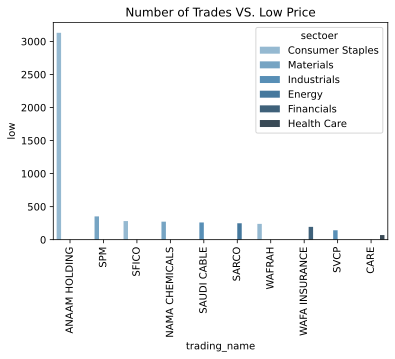

In [33]:
sns.barplot(x='trading_name', y='low' ,data= com_h_p, hue='sectoer' ,palette="Blues_d")
plt.xticks(rotation=90)
plt.title('Number of Trades VS. Low Price')


### I will be foucsing on stocks in Communication Services Sector

In [34]:
df[df['sectoer']=='Communication Services']['trading_name'].unique()

array(['ZAIN KSA', 'ATHEEB TELECOM', 'SRMG', 'ETIHAD ETISALAT', 'TAPRCO',
       'STC'], dtype=object)

In [35]:
Com_sec = df[df['sectoer']=='Communication Services']
Com_sec.sort_values('date', inplace=True)
Com_sec = Com_sec.set_index('date')
Com_sec.head()

/Users/noufsf19/opt/anaconda3/envs/project/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
date,,,,,,,,,,,,,
2001-12-31,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,21.0,21.0,21.0,21.0,-31.0,-59.62,3750.0,77933.75,3.0,0
2002-01-01,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,21.0,20.5,20.5,20.5,-0.5,-2.38,5213.0,107898.75,6.0,1
2002-01-02,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,20.5,20.5,20.5,20.5,0.0,0.00,6250.0,129375.00,2.0,2
2002-01-03,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,20.5,20.5,20.5,20.5,0.0,0.00,25325.0,522320.00,5.0,3
2002-01-05,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,20.5,21.0,20.5,20.5,0.0,0.00,17425.0,359205.00,7.0,5


### Exploratory Data Analysis for Communication Services sector

In [36]:
Com_sec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21523 entries, 2001-12-31 to 2020-04-23
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           21523 non-null  object 
 1   trading_name   21523 non-null  object 
 2   sectoer        21523 non-null  object 
 3   open           21523 non-null  float64
 4   high           21523 non-null  float64
 5   low            21523 non-null  float64
 6   close          21523 non-null  float64
 7   change         21523 non-null  float64
 8   perc_Change    21523 non-null  float64
 9   volume_traded  21523 non-null  float64
 10  value_traded   21523 non-null  float64
 11  no_trades      21523 non-null  float64
 12  day            21523 non-null  int64  
dtypes: float64(9), int64(1), object(3)
memory usage: 2.3+ MB


### Data Visualization for Communication Services Sector

In [37]:
#Com_sec = Com_sec.set_index('date')
Com_sec.reset_index(level=0, inplace=True)

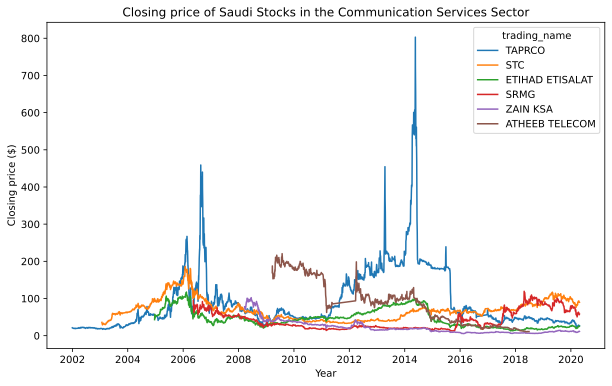

In [38]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=Com_sec.date, y="close", hue="trading_name",markers=True, data=Com_sec)
plt.title('Closing price of Saudi Stocks in the Communication Services Sector')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.show()

##### Through the above graph, we notice that the two oldest companies in the communication services sector are TAPRCO and STC, so I decided that I would conduct analyzes for these two companies.

### TAPRCO vs. STC

In [39]:
TAPRCO_df = df[df['trading_name']=='TAPRCO']
TAPRCO_df.sort_values('date', inplace=True)
TAPRCO_df = TAPRCO_df.set_index('date')
TAPRCO_df.describe()

/Users/noufsf19/opt/anaconda3/envs/project/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
count,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4611.000000,4.611000e+03,4.611000e+03,4611.000000,4611.000000
mean,91.808571,93.927419,90.112707,91.961160,-0.003043,0.052401,5.826033e+05,5.524078e+07,1206.984385,2.666667
std,83.668374,85.992817,81.707563,83.750857,5.953488,3.534383,8.953062e+05,1.154296e+08,1741.382758,2.188447
min,17.000000,17.000000,17.000000,17.000000,-80.000000,-59.620000,2.500000e+02,1.592500e+04,1.000000,0.000000
25%,42.500000,43.375000,41.500000,42.480000,-0.700000,-1.195000,8.382150e+04,5.784416e+06,236.500000,1.000000
50%,57.500000,58.500000,56.500000,57.500000,0.000000,0.000000,2.387070e+05,1.623859e+07,584.000000,2.000000
75%,126.000000,129.500000,122.750000,126.000000,0.600000,1.100000,6.436220e+05,5.031102e+07,1400.500000,5.000000
max,863.000000,883.000000,756.500000,803.000000,73.000000,11.760000,9.920626e+06,1.389762e+09,23141.000000,6.000000


In [40]:
STC_df = df[df['trading_name']=='STC']
STC_df.sort_values('date', inplace=True)
STC_df = STC_df.set_index('date')
STC_df.describe()

/Users/noufsf19/opt/anaconda3/envs/project/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
count,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4466.000000,4.466000e+03,4.466000e+03,4466.000000,4466.000000
mean,69.790137,70.590439,69.042521,69.845208,0.042183,0.037785,2.241216e+06,1.802651e+08,1127.461263,2.648231
std,28.398943,28.949294,27.903463,28.436665,2.141673,1.764626,3.964645e+06,3.650752e+08,1600.892708,2.184562
min,28.500000,29.750000,28.500000,29.000000,-15.250000,-10.280000,3.329600e+04,2.351837e+06,48.000000,0.000000
25%,45.800000,46.225000,45.500000,45.900000,-0.430000,-0.660000,4.754938e+05,2.618602e+07,324.000000,1.000000
50%,66.000000,66.750000,65.250000,66.000000,0.000000,0.000000,9.148000e+05,5.215328e+07,576.000000,2.000000
75%,82.250000,83.000000,81.475000,82.250000,0.500000,0.730000,2.174102e+06,1.605239e+08,1299.750000,5.000000
max,193.500000,193.500000,181.500000,186.000000,92.000000,10.360000,4.855156e+07,4.531583e+09,21064.000000,6.000000


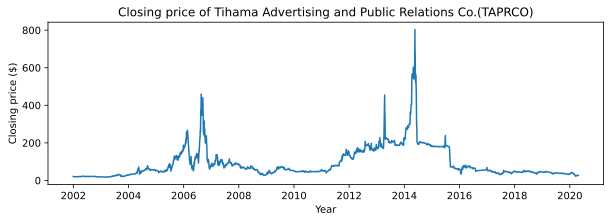

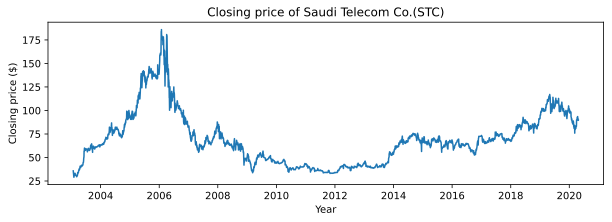

In [41]:
plt.figure(figsize=(10, 3))
plt.plot(TAPRCO_df['close'])
plt.title('Closing price of Tihama Advertising and Public Relations Co.(TAPRCO)')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(STC_df['close'])
plt.title('Closing price of Saudi Telecom Co.(STC)')
plt.ylabel('Closing price ($)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

# Modeling

### I built two  Linear Regression models, one for Tihama Advertising and Public Relations Co.(TAPRCO), and the other one for Saudi Telecom Co.(STC)

I seperated data into 2 portions: 80% for training, 20% for testing.

### A: Tihama Advertising and Public Relations Co.(TAPRCO)

In [42]:
df_2 = TAPRCO_df.copy()
df_2.head()

,name,trading_name,sectoer,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
date,,,,,,,,,,,,,
2001-12-31,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,21.0,21.0,21.0,21.0,-31.0,-59.62,3750.0,77933.75,3.0,0
2002-01-01,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,21.0,20.5,20.5,20.5,-0.5,-2.38,5213.0,107898.75,6.0,1
2002-01-02,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,20.5,20.5,20.5,20.5,0.0,0.00,6250.0,129375.00,2.0,2
2002-01-03,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,20.5,20.5,20.5,20.5,0.0,0.00,25325.0,522320.00,5.0,3
2002-01-05,Tihama Advertising and Public Relations Co.,TAPRCO,Communication Services,20.5,21.0,20.5,20.5,0.0,0.00,17425.0,359205.00,7.0,5


In [43]:
df_2.drop('name',axis=1, inplace = True)
df_2.drop('trading_name',axis=1, inplace = True)
df_2.drop('sectoer',axis=1, inplace = True)

In [44]:
df_2 = df_2.sort_values(by="date")
df_2.sort_index(ascending=True, axis=0,inplace = True)
df_2.head()

,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
date,,,,,,,,,,
2001-12-31,21.0,21.0,21.0,21.0,-31.0,-59.62,3750.0,77933.75,3.0,0
2002-01-01,21.0,20.5,20.5,20.5,-0.5,-2.38,5213.0,107898.75,6.0,1
2002-01-02,20.5,20.5,20.5,20.5,0.0,0.00,6250.0,129375.00,2.0,2
2002-01-03,20.5,20.5,20.5,20.5,0.0,0.00,25325.0,522320.00,5.0,3
2002-01-05,20.5,21.0,20.5,20.5,0.0,0.00,17425.0,359205.00,7.0,5


Technical indicators are calculated values describing movements in historic pricing data for securities like stocks, bonds, and ETFs. Investors use these metrics to predict the movements of stocks to best determine when to buy, sell, or hold. Commonly used technical indicators include moving averages (SMA, EMA, MACD) and several others.

To add our technical indicators we used this operation to add A simple moving average (SMA) which is calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.

In [45]:

for i in range(0,df_2.shape[0]-10):
    df_2.loc[df_2.index[i+10],'SMA_10'] = np.round(((df_2.iloc[i,1]+ df_2.iloc[i+1,1] +df_2.iloc[i+2,1])/3),1)

In [46]:
df_2.head()

,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day,SMA_10
date,,,,,,,,,,,
2001-12-31,21.0,21.0,21.0,21.0,-31.0,-59.62,3750.0,77933.75,3.0,0,NaN
2002-01-01,21.0,20.5,20.5,20.5,-0.5,-2.38,5213.0,107898.75,6.0,1,NaN
2002-01-02,20.5,20.5,20.5,20.5,0.0,0.00,6250.0,129375.00,2.0,2,NaN
2002-01-03,20.5,20.5,20.5,20.5,0.0,0.00,25325.0,522320.00,5.0,3,NaN
2002-01-05,20.5,21.0,20.5,20.5,0.0,0.00,17425.0,359205.00,7.0,5,NaN


In [47]:
df_2 =df_2[['close','SMA_10']]

In [48]:
df_2.head()

,close,SMA_10
date,,
2001-12-31,21.0,NaN
2002-01-01,20.5,NaN
2002-01-02,20.5,NaN
2002-01-03,20.5,NaN
2002-01-05,20.5,NaN


In [49]:
# Drop the first 3-rows which are null value
df_2 = df_2.iloc[10:]
df_2.head()

,close,SMA_10
date,,
2002-01-15,20.0,20.7
2002-01-16,19.5,20.5
2002-01-21,19.5,20.7
2002-01-24,20.0,20.8
2002-01-26,20.0,20.8


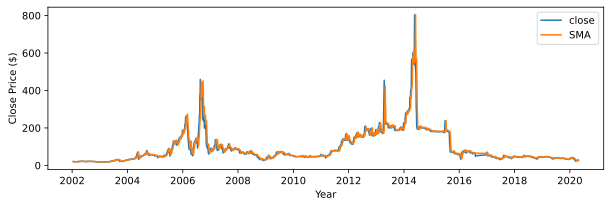

In [50]:
plt.figure(figsize = [10 ,3])
plt.plot(df_2['close'], label = 'close')
plt.plot(df_2['SMA_10'], label = 'SMA')
plt.xlabel('Year')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(False)
plt.show()

#### We can see that our data has been split into separate DataFrame objects with the nearest whole-number value of rows reflective of our 80/10 split (3644 train samples, 923 test samples.) Note the test size 0.20 (20%) was specified as an argument to the train_test_split function.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_2[['close']], df_2[['SMA_10']], test_size=.2)

### Craete Linear Regression medel

In [52]:
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, model.predict(X_test)))
print("Coefficient of Determination:", r2_score(y_test, X_test))

Model Coefficients: [[0.97252997]]
Mean Absolute Error: 9.990285540111627
Coefficient of Determination: 0.9097901189159134


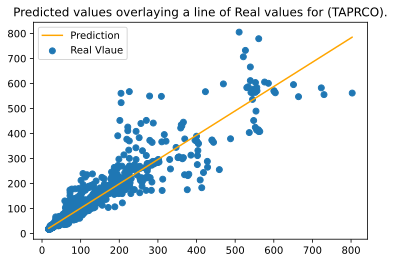

In [54]:
plt.scatter(X_train, y_train,  label = 'Real Vlaue')
plt.plot(X_train, model.predict(X_train), color = "orange", label = 'Prediction')
plt.title("Predicted values overlaying a line of Real values for (TAPRCO).")
plt.legend()
plt.show()

### B: Saudi Telecom Co.(STC)

In [55]:
STC_df.drop('name',axis=1, inplace = True)
STC_df.drop('trading_name',axis=1, inplace = True)
STC_df.drop('sectoer',axis=1, inplace = True)

In [56]:
STC_df = STC_df.sort_values(by="date")
STC_df.sort_index(ascending=True, axis=0,inplace = True)
STC_df.head()

,open,high,low,close,change,perc_Change,volume_traded,value_traded,no_trades,day
date,,,,,,,,,,
2003-01-25,33.75,37.25,33.50,35.75,35.75,0.00,43287204.0,1.520917e+09,6369.0,5
2003-01-26,35.75,36.25,35.00,35.00,-0.75,-2.10,18739045.0,6.621076e+08,4179.0,6
2003-01-27,34.75,34.75,32.75,33.50,-1.50,-4.29,21504936.0,7.221220e+08,5128.0,0
2003-01-28,33.50,33.50,33.25,33.25,-0.25,-0.75,5068153.0,1.708552e+08,3003.0,1
2003-01-29,33.50,33.50,31.50,31.50,-1.75,-5.26,9011815.0,2.894504e+08,3563.0,2


In [57]:
for i in range(0,STC_df.shape[0]-10):
    STC_df.loc[STC_df.index[i+10],'SMA_10'] = np.round(((STC_df.iloc[i,1]+ STC_df.iloc[i+1,1] +STC_df.iloc[i+2,1])/3),1)

In [58]:
STC_df =STC_df[['close','SMA_10']]
STC_df = STC_df.iloc[10:]
STC_df.head()

,close,SMA_10
date,,
2003-02-05,30.25,36.1
2003-02-15,33.25,34.8
2003-02-16,33.00,33.9
2003-02-17,32.25,32.8
2003-02-18,32.75,32.1


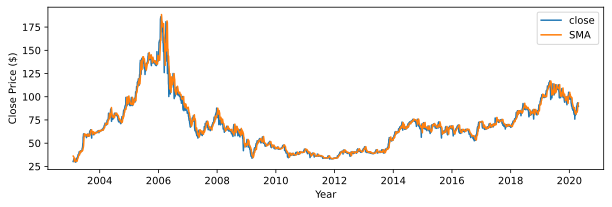

In [59]:
plt.figure(figsize = [10 ,3])
plt.plot(STC_df['close'], label = 'close')
plt.plot(STC_df['SMA_10'], label = 'SMA')
plt.xlabel('Year')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(False)
plt.show()

In [60]:
#### split STC data set into two sets: train and test
X_train2, X_test2, y_train2, y_test2 = train_test_split(STC_df[['close']], STC_df[['SMA_10']], test_size=.2)

In [61]:
# build linear regresion model for STC

In [62]:
# Create Regression Model
model2 = LinearRegression()
# Train the model
model2.fit(X_train2, y_train2)

LinearRegression()

In [63]:
print("Model Coefficients:", model2.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test2, model2.predict(X_test2)))
print("Coefficient of Determination:", r2_score(y_test2, X_test2))

Model Coefficients: [[1.00448636]]
Mean Absolute Error: 2.833952706202671
Coefficient of Determination: 0.9750955790215199


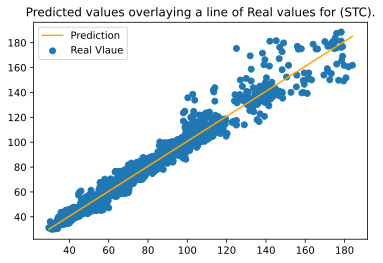

In [64]:
plt.scatter(X_train2, y_train2,  label = 'Real Vlaue')
plt.plot(X_train2, model2.predict(X_train2), color = "orange", label = 'Prediction')
plt.title("Predicted values overlaying a line of Real values for (STC).")
plt.legend()
plt.show()